Computes completed travel time matrix, with missing distances filled in by computing shortest paths.

In [ ]:
import numpy as np
import networkx as nx

def complete_tmatrix(citypath, city, mode):
    '''
    citypath: string. path where data/travel time matrices are stored. 
        In TDA for Resource Access Drive, this is one of {Atlanta, Chicago, Jacksonville, Los Angeles, NYC, Salt Lake City}.
    city: {atl, chc, jax, lac, manbronx, queensbrook, stat, slc}
        Each time travel matrix for the city (for mode = car or pub) should be of the form citypath + f"/{city}_t{mode}_matrix.csv"
    mode: {car, pub}. Form of transportation.
    
    Computes completed travel time matrix, with missing distances filled in by computing shortest paths.
        Saves to citypath + f"/{city}_t{mode}_matrix_completed.npy"
    '''
    matrix_path = citypath + f'/{city}_t{mode}_matrix.csv'
    tmatrix = np.genfromtxt(matrix_path, delimiter=',')
    G_mode = nx.from_numpy_matrix(tmatrix, create_using = nx.DiGraph()) # G_{mode}, as defined in overleaf for mode = car or pub
    tmatrix = nx.algorithms.shortest_paths.dense.floyd_warshall_numpy(G_mode)
    np.save(citypath + f"/{city}_t{mode}_matrix_completed.npy", tmatrix)
    
def d_tilde_matrix(citypath, city):
    '''
    citypath: string. path where data/travel time matrices are stored
        In TDA for Resource Access Drive, this is one of {Atlanta, Chicago, Jacksonville, Los Angeles, NYC, Salt Lake City}.
    city: {atl, chc, jax, lac, manbronx, queensbrook, stat, slc}.
        The walk time matrix file for the city should be of the form citypath + f"/{city}_twalk_matrix.csv"
        The completed travel time matrix files for the city (for mode = pub or car) should be of the form citypath + f"/{city}_t{mode}_matrix_completed.npy 
    
    Computes d_tilde matrix (as defined in overleaf). Assume that the completed travel time matrices are already computed.
        Saves to citypath + f"{city}_dtilde.npy"
    '''
    return
    
    
def d_matrix(citypath, city):
    '''
    citypath: string. path where data/travel time matrices are stored
        In TDA for Resource Access Drive, this is one of {Atlanta, Chicago, Jacksonville, Los Angeles, NYC, Salt Lake City}.
    city: {atl, chc, jax, lac, manbronx, queensbrook, stat, slc}.
        The (asymmetric) d_tilde matrix file should be of the form citypath + f"/{city}_dtilde.npy"
    
    Computes (symmetric) d_matrix (as defined in overleaf).
        Saves to citypath + f"{city}_d_matrix.npy"
    '''
    return
    

[[0. 1. 1.]
 [2. 0. 2.]
 [3. 4. 0.]]


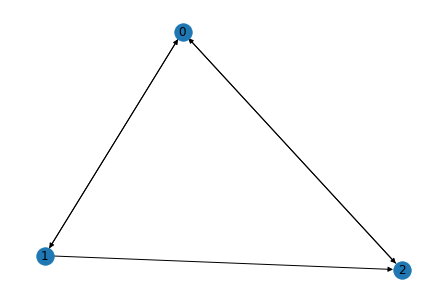

In [ ]:
# Testing shortest weighted path calculation
A = np.array([[0, 1, 1], [2, 0, 2], [3, 0, 0]])
G = nx.from_numpy_matrix(A, create_using = nx.DiGraph())
nx.draw(G, with_labels = True)
D = nx.algorithms.shortest_paths.dense.floyd_warshall_numpy(G)
print(D)

Complete travel time matrices and save results. Only needs to be run once.

In [ ]:
modes = {'car', 'pub'}

# Everything but NYC
citypaths = ['Atlanta', 'Chicago', 'Jacksonville', 'Los Angeles', 'Salt Lake City']
cities = ['atl', 'chc', 'jax', 'lac', 'slc']
for i in range(5):
    for mode in modes:
        complete_tmatrix(citypaths[i], cities[i], mode)

# NYC
cities = ['manbronx', 'queensbrook', 'stat']
for city in cities:
    for mode in modes:
        complete_tmatrix("NYC", city, mode)